<a href="https://colab.research.google.com/github/soheilpaper/So-AI-Love-/blob/master/notebooks/1.0-test-noise-reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

#### Download packages if in Google Colab

In [10]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",
    "pip install pseudo-microbit",
    "pip install keyboard"

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Test noise reduction algorithm and view steps of algorithm

In [4]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

### Load data

In [5]:
#@title Install dependencies

!pip install -q omegaconf torchaudio pydub

import os
from os.path import exists

if not exists('silero-models'):
  !git clone -q --depth 1 https://github.com/snakers4/silero-models

%cd silero-models

# silero imports
import torch
import random
from glob import glob
from omegaconf import OmegaConf
from src.silero.utils import (init_jit_model, 
                       split_into_batches,
                       read_audio,
                       read_batch,
                       prepare_model_input)
from colab_utils import (record_audio,
                         audio_bytes_to_np,
                         upload_audio)

device = torch.device('cpu')   # you can use any pytorch device
models = OmegaConf.load('models.yml')

# imports for uploading/recording
import numpy as np
import ipywidgets as widgets
from scipy.io import wavfile
from IPython.display import Audio, display, clear_output
from torchaudio.functional import vad


# wav to text method
def wav_to_text(f='test.wav'):
  batch = read_batch([f])
  input = prepare_model_input(batch, device=device)
  output = model(input)
  return decoder(output[0].cpu())

/content/silero-models


In [6]:
#@markdown { run: "auto" }

language = "English" #@param ["English", "German", "Spanish"]

print(language)
if language == 'German':
  model, decoder = init_jit_model(models.stt_models.de.latest.jit, device=device)
elif language == "Spanish":
  model, decoder = init_jit_model(models.stt_models.es.latest.jit, device=device)
else:
  model, decoder = init_jit_model(models.stt_models.en.latest.jit, device=device)

English


In [7]:
#@markdown { run: "auto" }

use_VAD = "No" #@param ["Yes", "No"]

In [41]:
#@markdown Either record audio from microphone or upload audio from file (.mp3 or .wav) { run: "auto" }

record_or_upload = "Record" #@param ["Record", "Upload (.mp3 or .wav)"]
record_seconds =  8 #@param {type:"number", min:1, max:10, step:1}
sample_rate = 16000
global rec_v
rec_v=0

def _apply_vad(audio, boot_time=0, trigger_level=9, **kwargs):
  print('\nVAD applied\n')
  vad_kwargs = dict(locals().copy(), **kwargs)
  vad_kwargs['sample_rate'] = sample_rate
  del vad_kwargs['kwargs'], vad_kwargs['audio']
  audio = vad(torch.flip(audio, ([0])), **vad_kwargs)
  return vad(torch.flip(audio, ([0])), **vad_kwargs)

def _recognize(audio):
  display(Audio(audio, rate=sample_rate, autoplay=True))
  if use_VAD == "Yes":
    audio = _apply_vad(audio)
  wavfile.write('test.wav', sample_rate, (32767*audio).numpy().astype(np.int16))
  transcription = wav_to_text()
  print('\n\nTRANSCRIPTION:\n')
  print(transcription)

def _record_audio(b):
  clear_output()
  audio = record_audio(record_seconds)
  wavfile.write('recorded.wav', sample_rate, (32767*audio).numpy().astype(np.int16))
  _recognize(audio)
  
  rec_v=1
  #while True:
     
  return rec_v

  

def _upload_audio(b):
  clear_output()
  audio = upload_audio()
  _recognize(audio)
  return audio
import keyboard

if True:
   if record_or_upload == "Record":
      button = widgets.Button(description="Record Speech")
      display(button)
      if True :
          button.on_click(_record_audio)
          #if rec_v == "1":

             #break
      #input('press key to continue')
      
      #keyboard.get_event()
      
      #while rec_v!=1:
      #    print ("wating")

   else:
      audio = _upload_audio("")
      rec_v=1

Starting recording for 8 seconds...


<IPython.core.display.Javascript object>

Finished recording!




TRANSCRIPTION:

but us in sp challenges


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1190: UserWarning: operator() profile_node %574 : int[] = prim::profile_ivalue(%572)
 does not have profile information (Triggered internally at ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:105.)
  return forward_call(*input, **kwargs)


In [44]:
#@markdown Check audio after applying VAD { run: "auto" }

if record_or_upload == "Record":
  audio = read_audio('recorded.wav', sample_rate)
display(Audio(_apply_vad(audio), rate=sample_rate, autoplay=True))


VAD applied



#Check file

In [45]:
!sudo apt-get install ffmpeg
!sudo apt-get install -y python-pydub
!pip install pydub
# import required modules 
from os import path 
from pydub import AudioSegment 
# we need pydub for later
! pip3  install pydub

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pydub is already the newest version (0.20.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [47]:


# and this
from google.colab import files
!pwd
! rm -f song.mp3  # remove the song.mp3 if it exists
#files.upload()
! echo "Moving song.mp3...."
#! mv song.mp3 spleeter/audio_example.mp3
  
# assign files 
input_file ="/content/ss.mp3" # "/content/*.mp3"
output_file = "/content/ss.wav"
path=output_file

# convert mp3 file to wav file 
#sound = AudioSegment.from_mp3(input_file) 
#sound.export(output_file, format="wav")

/content/silero-models
Moving song.mp3....


In [48]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
url = "https://github.com/soheilpaper/So-AI-Love-/raw/master/assets/ss.wav"

url = " https://www2.cs.uic.edu/~i101/SoundFiles/preamble10.wav" #"https://file-examples.com/wp-content/uploads/2017/11/file_example_WAV_1MG.wav"
#response = urllib.request.urlopen(url)
#data, rate = sf.read(io.BytesIO(response.read()))
#data = data

In [65]:
data, rate =sf.read('/content/silero-models/recorded.wav')
data = data

In [66]:
IPython.display.Audio(data=data, rate=rate)

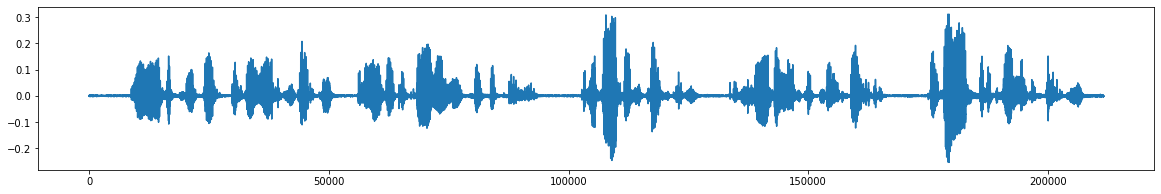

In [50]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### add noise

In [51]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

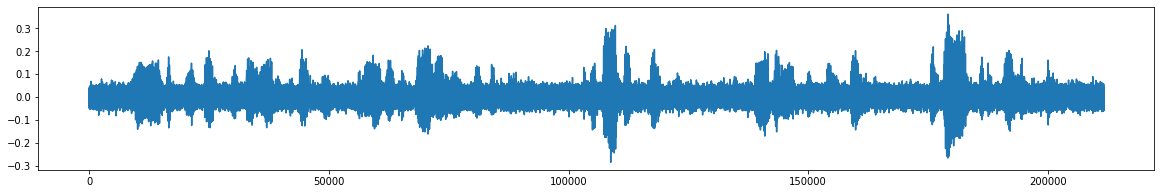

In [52]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [53]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

### Stationary remove noise

In [54]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

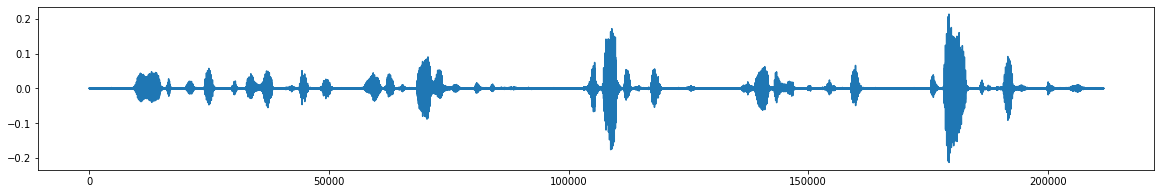

In [55]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [56]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### Non-stationary noise reduction

In [57]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

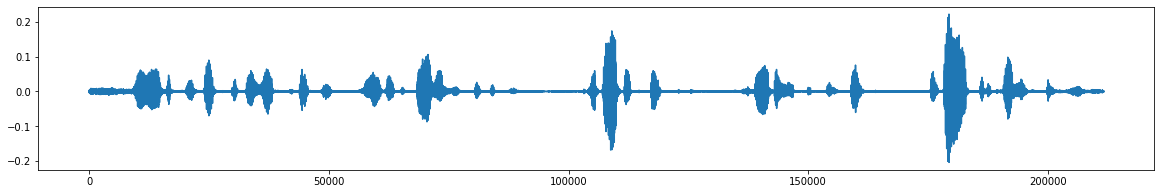

In [58]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

## A more difficult example 

In [59]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

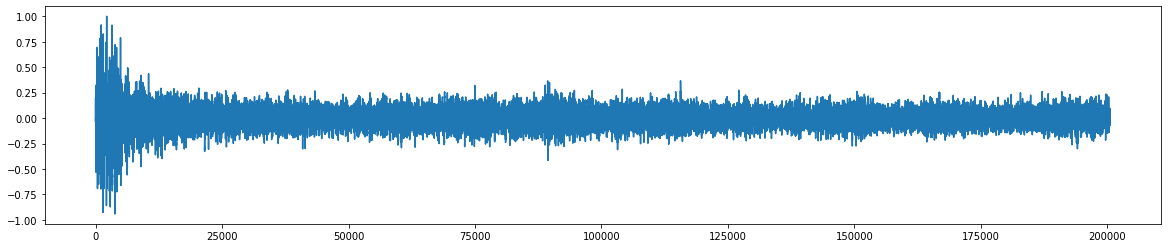

In [60]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [61]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

### add noise to data

In [62]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

ValueError: ignored

### plot noisy data

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)
IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

### Stationary remove noise

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, y_noise = noise_clip, n_std_thresh_stationary=1.5,stationary=True)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### Non-stationary noise reduction

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise, alpha = 1)
IPython.display.Audio(data=reduced_noise, rate=rate)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### ensure that noise reduction does not cause distortion when prop_decrease == 0

In [ ]:
noise_reduced = nr.reduce_noise(y=data, sr=rate, prop_decrease=0, stationary=False)

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,6))
axs[0].plot(data[3000:5000])
axs[0].plot(noise_reduced[3000:5000])
axs[1].plot(data)
axs[1].plot(noise_reduced)

In [ ]:
noise_reduced = nr.reduce_noise(y=data, sr=rate, prop_decrease=0, stationary=False)

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,6))
axs[0].plot(data[3000:5000])
axs[0].plot(noise_reduced[3000:5000])
axs[1].plot(data)
axs[1].plot(noise_reduced)

### Reduce noise over batches in parallel on long signal

In [ ]:
long_data = np.tile(data, 10)
len(long_data)/rate

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(long_data)

In [ ]:
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(long_data), samplerate=rate)*10
audio_clip_band_limited = long_data+noise

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [ ]:
reduced_noise = nr.reduce_noise(
    y=audio_clip_band_limited,
    sr=rate,
    thresh_n_mult_nonstationary=2,
    stationary=False,
    n_jobs=2,
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)
ax.plot(reduced_noise)

In [ ]:
reduced_noise = nr.reduce_noise(
    y=audio_clip_band_limited,
    sr=rate,
    thresh_n_mult_nonstationary=2,
    stationary=True,
    n_jobs=2,
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)
ax.plot(reduced_noise)

### Reduce noise on only a subset of a long clip

In [ ]:
from noisereduce.noisereduce import SpectralGateStationary

In [ ]:
sg = SpectralGateStationary(
    y = data,
    sr = rate,
    y_noise=None,
    prop_decrease=1.0,
    time_constant_s=2.0,
    freq_mask_smooth_hz=500,
    time_mask_smooth_ms=50,
    n_std_thresh_stationary=1.5,
    tmp_folder=None,
    chunk_size=600000,
    padding=30000,
    n_fft=1024,
    win_length=None,
    hop_length=None,
    clip_noise_stationary=True,
    use_tqdm=False,
    n_jobs=1,
)

In [ ]:
subset_noise_reduce = sg.get_traces(start_frame = 10000, end_frame = 20000)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(subset_noise_reduce)

## Multichannel noise

In [ ]:
audio_clip_cafe_2_channel = np.vstack([audio_clip_cafe, audio_clip_cafe])
audio_clip_cafe_2_channel.shape

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe_2_channel, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

In [ ]:
reduced_noise.shape

In [ ]:
fig, axs = plt.subplots(nrows= 2, figsize=(20,5))
axs[0].plot(audio_clip_cafe_2_channel[0])
axs[1].plot(audio_clip_cafe_2_channel[1])

axs[0].plot(reduced_noise[0])
axs[1].plot(reduced_noise[1])

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

In [ ]:
reduced_noise.shape

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise, alpha = 1)
IPython.display.Audio(data=reduced_noise, rate=rate)